[3, 4, 5, 6, 7, 8, 9] [312, 950, 1286, 1575, 1557, 1267, 904]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [26, 427, 2130, 7186, 15920, 29874, 41998, 51627, 53402]
[11, 12, 13, 14, 15, 16, 17] [316, 153, 79, 31, 11, 4, 2]
[18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31] [1471, 760, 359, 168, 74, 31, 12, 8, 3, 2, 2, 1]


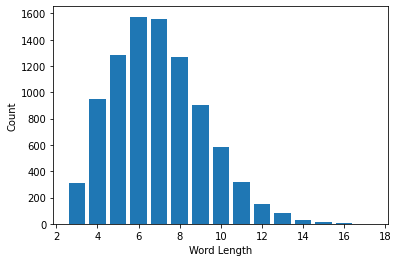

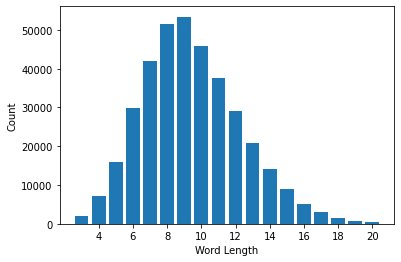

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

def get_word_length_distribution(list_words):
    counter = Counter(map(len, list_words))
    x = sorted(list(counter.keys())) 
    y = [counter[i] for i in x] 
    return x, y

def read_words(file):
    with open(mode='r', file=file) as f:
        return [x.strip() for x in f]
    

path1 = "../dictionary_9030.txt"
path2 = "../dictionary_large.txt"

words1 = read_words(path1)
words2 = read_words(path2)
x1, y1 = get_word_length_distribution(words1)
x2, y2 = get_word_length_distribution(words2)

print(x1[:7], y1[:7])
print(x2[:9], y2[:9])

print(x1[-7:], y1[-7:])
print(x2[17:], y2[17:])

plt.bar(x1, y1)
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.show()

plt.bar(x2[2:20], y2[2:20])
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.xticks([x for x in range(4, 21, 2)])
plt.savefig('word_distribution.png', dpi=300, bbox_inches="tight")
plt.show()

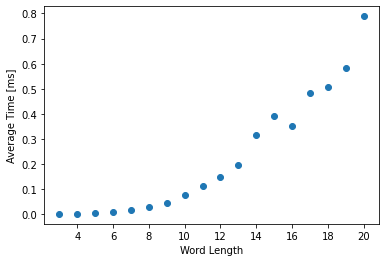

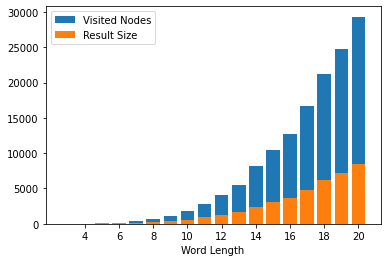

In [24]:
path = "word_challenge.csv"
df = pd.read_csv(path, sep= " ")
mid = 8
df = df[df["word_length"] >= 3]
df = df[df["word_length"] <= 20]

x = df["word_length"]
x_ticks = [x for x in range(4, 21, 2)]
marker_size = 10

# Time
y1 = df["time[ms]"] 
plt.scatter(x, y1)
plt.xlabel('Word Length')
plt.ylabel('Average Time [ms]')
plt.xticks(x_ticks)
plt.savefig('word_challenge_time.png', dpi=300, bbox_inches="tight")
plt.show()

# Nodes and Result Size
y1 = df["avg_result_size"]   
y2 = df["avg_visited_nodes"] 
plt.bar(x, y2, label="Visited Nodes")
plt.bar(x, y1, label="Result Size")

plt.xlabel('Word Length')
plt.xticks(x_ticks)
plt.legend()
plt.savefig('word_challenge_nodes.png', dpi=300, bbox_inches="tight")
plt.savefig('word_challenge_nodes.jpg', dpi=300)
plt.show()

    index  avg_guesses
0      18        -1.34
1      18        -0.49
2      18        -0.70
3      18        -0.51
4      18        -0.21
5      18        -0.40
6      18        -0.27
7      18        -0.08
8      18        -0.28
9      18        -0.21
10     18        -0.27
11     18        -0.22
12     18        -0.13
13     18        -0.07
14     18        -0.08
15     18         0.01
16     18        -0.06
17     18         0.02
Time


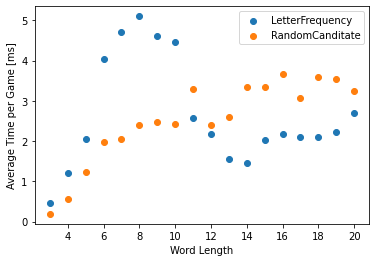

Guesses


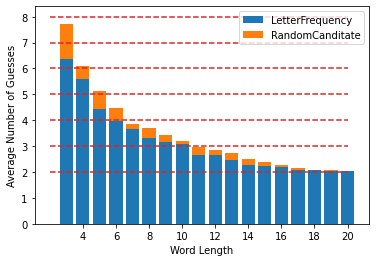

Candidates


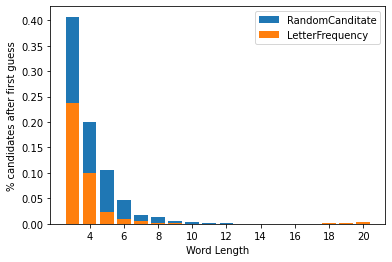

In [25]:
path = "wordle.csv"
df = pd.read_csv(path, sep=" ")

df_small = df[df["total_words"] < 10**4]
df_large = df[df["total_words"] > 10**4]

strategies = ["random_canditate", "letter_frequency"]
strategy_name = ["RandomCanditate", "LetterFrequency"]

for df in [df_large]:
# for df in [df_small, df_large]:
    
    df1 = df[df["strategy"] == strategies[0]]
    df2 = df[df["strategy"] == strategies[1]]
    s1 = strategy_name[0]
    s2 = strategy_name[1]
    
    print(df2["avg_guesses"].reset_index() - df1["avg_guesses"].reset_index())

    x = df1["word_length"]
    x_ticks = [i for i in range(2, 21, 2) if i in set(x)]

    # Time
    print("Time")
    plt.scatter(x, df2["time[ms]"], label=s2)
    plt.scatter(x, df1["time[ms]"], label=s1)
    plt.xlabel('Word Length')
    plt.ylabel('Average Time per Game [ms]')
    plt.xticks(x_ticks)
    plt.legend()
    plt.savefig('wordle_time.png', dpi=300, bbox_inches="tight")
    plt.show()

    # Guesses
    print("Guesses")
    plt.bar(x, df1["avg_guesses"], label=s1, color="tab:orange")
    plt.bar(x, df2["avg_guesses"], label=s2, color="tab:blue")
    plt.hlines([i for i in range(2, 9)], linestyles='dashed', xmin=2, xmax=max(x_ticks), colors="tab:red")

    # change order of legend
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    plt.xlabel('Word Length')
    plt.ylabel('Average Number of Guesses')
    plt.xticks(x_ticks)
    plt.savefig('wordle_guesses.png', dpi=300, bbox_inches="tight")
    plt.savefig('wordle_guesses.jpg', dpi=300)
    plt.show()

    # Candidates
    print("Candidates")
    plt.bar(x, df1["candidates_2"] / df1["candidates_1"], label=s1)
    plt.bar(x, df2["candidates_2"] / df2["candidates_1"], label=s2)
    plt.xlabel('Word Length')
    plt.ylabel('% candidates after first guess')
    plt.xticks(x_ticks)
    plt.savefig('wordle_candidates.png', dpi=300, bbox_inches="tight")
    plt.legend()
    plt.show()